In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams

%matplotlib inline

In [2]:
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10, 7

In [3]:
df = pd.read_excel('Crime.xls')
df.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [4]:
# Cleaning data

df = df.drop(range(0,4))

df.columns = ['City', 'Population', 'Violent Crime', 'Murder and nonnegligent manslaughter',
             'Rape (revised definition)', 'Rape (legacy definition)', 'Robbery', 'Aggravated assault',
             'Property Crime', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Arson']

df = df.drop(range(352, 355))
df = df.drop('Rape (revised definition)',axis=1)
df['Pop sqrd'] = df['Population']**2 # adding this variable as per the course material
df.head()

,City,Population,Violent Crime,Murder and nonnegligent manslaughter,Rape (legacy definition),Robbery,Aggravated assault,Property Crime,Burglary,Larceny theft,Motor vehicle theft,Arson,Pop sqrd
4,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,3463321
5,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0,6640929
6,Akron Village,2846,3,0,0,0,3,16,1,15,0,0,8099716
7,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN,9595377936
8,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN,40806544


In [5]:
linreg = LinearRegression()

X = df[['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Pop sqrd']]
Y = df[['Property Crime']]

linreg.fit(X,Y)

print('intercept: ', linreg.intercept_)
print('score: ', linreg.score(X,Y))

multi_reg_df = pd.DataFrame(['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Pop sqrd'])

multi_reg_df.columns = ['Features']
multi_reg_df['Coef'] = linreg.coef_.reshape(-1,1)

multi_reg_df

intercept:  [3.41060513e-12]
score:  1.0


,Features,Coef
0,Population,-2.779441e-17
1,Violent Crime,3.166625e-08
2,Murder and nonnegligent manslaughter,-3.166608e-08
3,Rape (legacy definition),-3.166619e-08
4,Robbery,-3.166626e-08
5,Aggravated assault,-3.166625e-08
6,Burglary,1.000000e+00
7,Larceny theft,1.000000e+00
8,Motor vehicle theft,1.000000e+00
9,Pop sqrd,-6.617445e-24


In [6]:
X = df[['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Pop sqrd']]
Y = df[['Property Crime']]

linreg.fit(X,Y)

print('intercept: ', linreg.intercept_)
print('score: ', linreg.score(X,Y))

multi_reg_df = pd.DataFrame(['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Pop sqrd'])

multi_reg_df.columns = ['Features']
multi_reg_df['Coef'] = linreg.coef_.reshape(-1,1)

multi_reg_df

intercept:  [8.74610691]
score:  0.9991111563308183


,Features,Coef
0,Population,1.358544e-02
1,Violent Crime,2.019581e+01
2,Murder and nonnegligent manslaughter,3.607316e+01
3,Rape (legacy definition),2.465948e+01
4,Robbery,-2.110738e+01
5,Aggravated assault,-1.942935e+01
6,Pop sqrd,-6.767245e-10


In [7]:
X = df[['Population',  'Murder and nonnegligent manslaughter', 
       'Robbery', 'Pop sqrd']]
Y = df[['Property Crime']]

linreg.fit(X,Y)

print('intercept: ', linreg.intercept_)
print('score: ', linreg.score(X,Y))

multi_reg_df = pd.DataFrame(['Population', 'Murder and nonnegligent manslaughter',
       'Robbery', 'Pop sqrd'])

multi_reg_df.columns = ['Features']
multi_reg_df['Coef'] = linreg.coef_.reshape(-1,1)

multi_reg_df

intercept:  [24.1315523]
score:  0.9987417419604476


,Features,Coef
0,Population,1.592371e-02
1,Murder and nonnegligent manslaughter,1.175599e+02
2,Robbery,2.091864e+00
3,Pop sqrd,-1.010463e-09


In [8]:
features = ['Population', 'Violent Crime',
       'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Property Crime', 'Burglary',
       'Larceny theft', 'Motor vehicle theft', 'Pop sqrd']
    

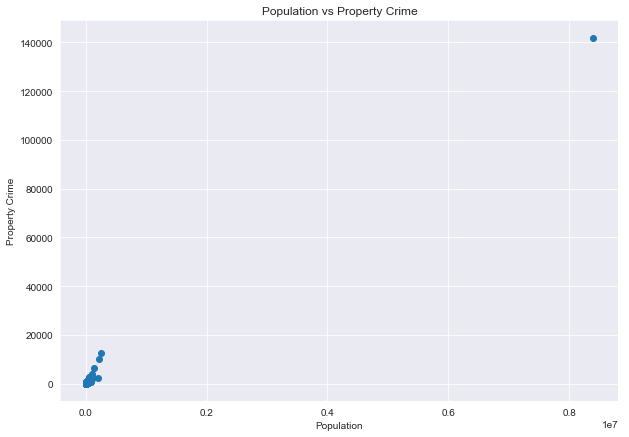

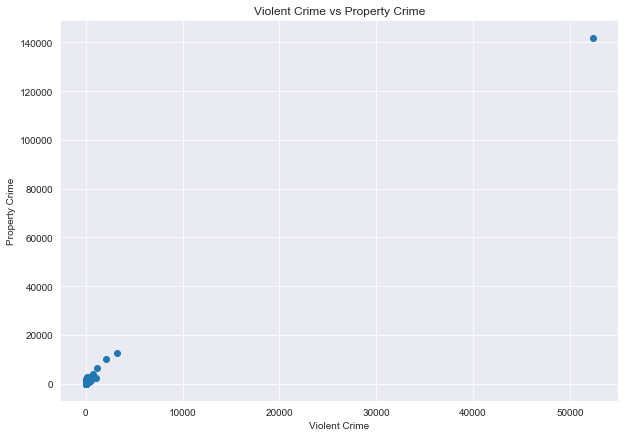

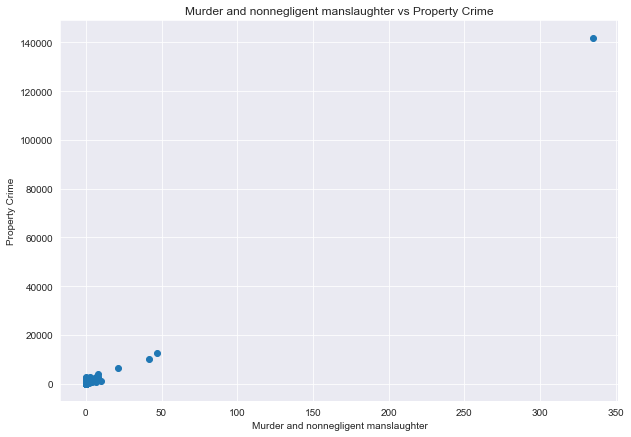

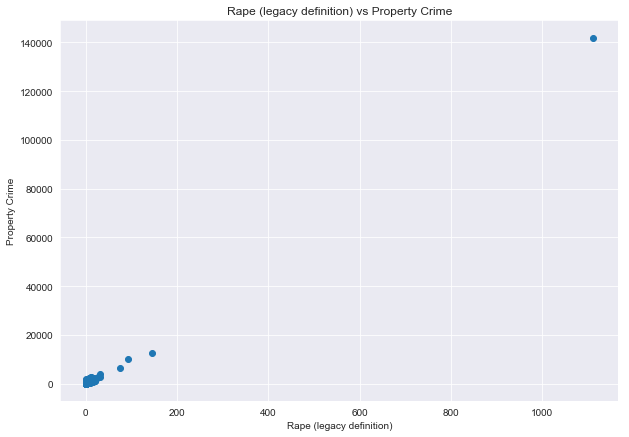

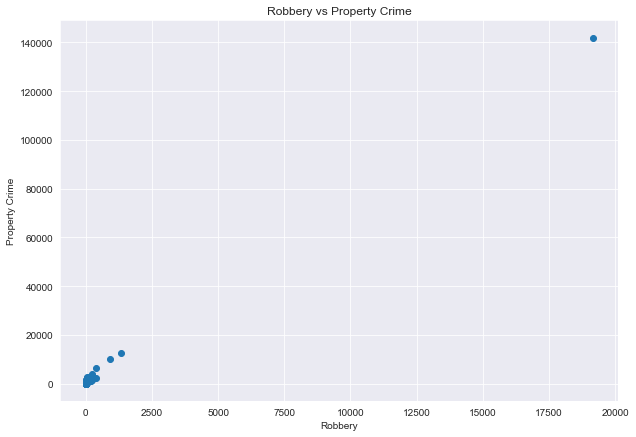

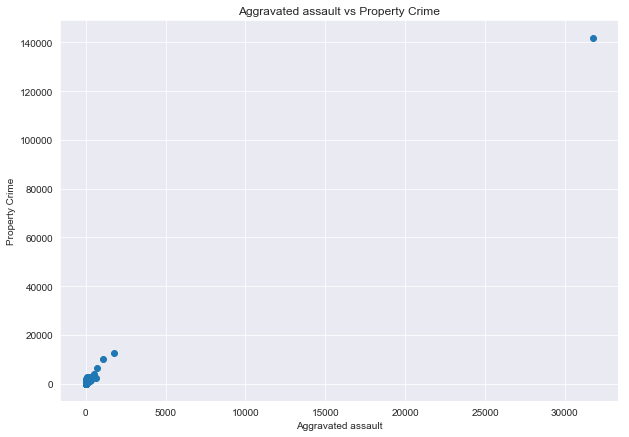

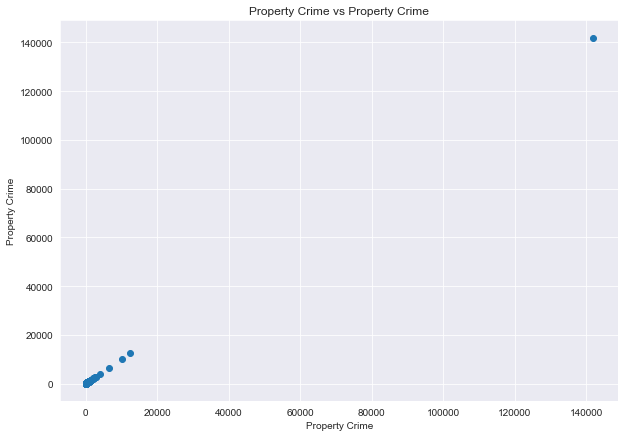

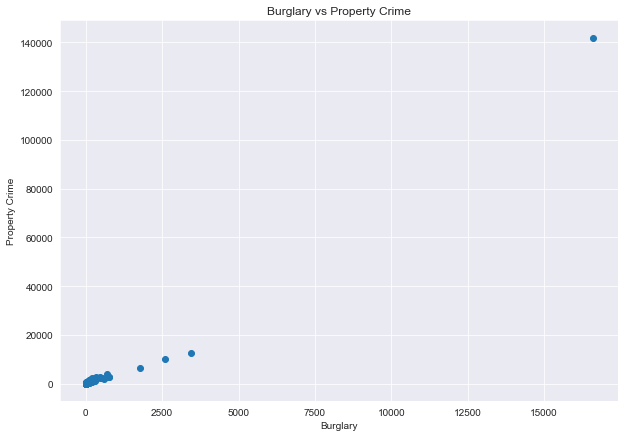

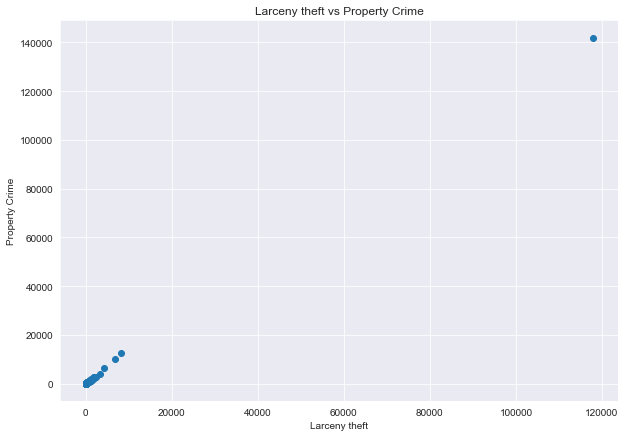

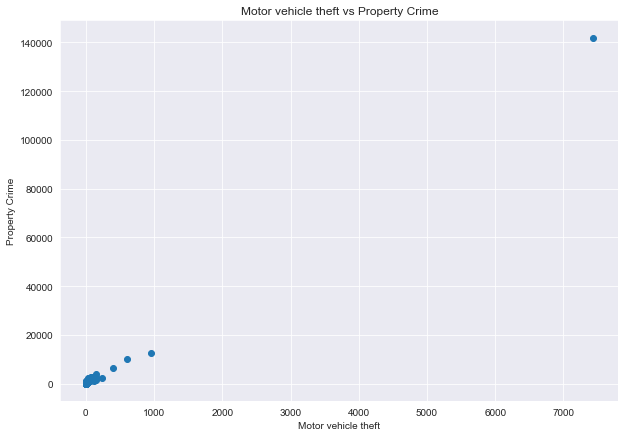

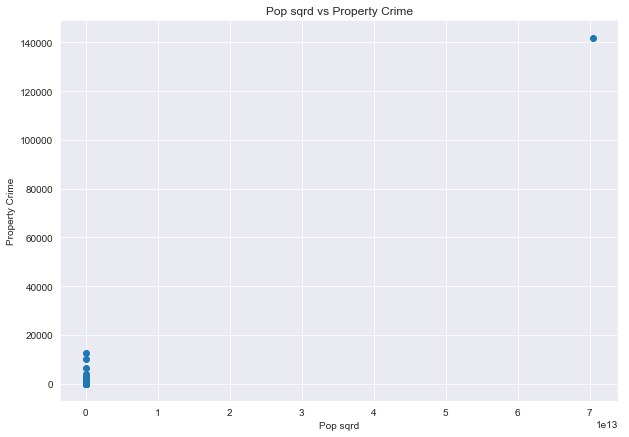

In [9]:
for feature in features:
    plt.scatter(df[feature], df['Property Crime'])
    plt.xlabel(feature)
    plt.ylabel('Property Crime')
    plt.title(feature + ' vs Property Crime')
    plt.show()

In [10]:
df[df['Property Crime'] == df['Property Crime'].max()]

,City,Population,Violent Crime,Murder and nonnegligent manslaughter,Rape (legacy definition),Robbery,Aggravated assault,Property Crime,Burglary,Larceny theft,Motor vehicle theft,Arson,Pop sqrd
220,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434,NaN,70494931807876


In [11]:
df = df.drop(220)

In [12]:
X = df[['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Pop sqrd']]
Y = df[['Property Crime']]

linreg.fit(X,Y)

print('intercept: ', linreg.intercept_)
print('score: ', linreg.score(X,Y))

multi_reg_df = pd.DataFrame(['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Pop sqrd'])

multi_reg_df.columns = ['Features']
multi_reg_df['Coef'] = linreg.coef_.reshape(-1,1)

multi_reg_df

intercept:  [9.00399755e-11]
score:  1.0


,Features,Coef
0,Population,3.302111e-15
1,Violent Crime,-3.778833e-10
2,Murder and nonnegligent manslaughter,3.781203e-10
3,Rape (legacy definition),3.778337e-10
4,Robbery,3.778764e-10
5,Aggravated assault,3.778922e-10
6,Burglary,1.000000e+00
7,Larceny theft,1.000000e+00
8,Motor vehicle theft,1.000000e+00
9,Pop sqrd,-1.451338e-19


In [13]:
X = df[['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Pop sqrd']]
Y = df[['Property Crime']]

linreg.fit(X,Y)

print('intercept: ', linreg.intercept_)
print('score: ', linreg.score(X,Y))

multi_reg_df = pd.DataFrame(['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Pop sqrd'])

multi_reg_df.columns = ['Features']
multi_reg_df['Coef'] = linreg.coef_.reshape(-1,1)

multi_reg_df

intercept:  [-34.41538256]
score:  0.9573762505666609


,Features,Coef
0,Population,1.805893e-02
1,Violent Crime,1.735712e+01
2,Murder and nonnegligent manslaughter,2.009497e+01
3,Rape (legacy definition),2.914066e+01
4,Robbery,-1.425734e+01
5,Aggravated assault,-1.762117e+01
6,Pop sqrd,-6.348989e-08


In [14]:
X = df[['Population',  'Murder and nonnegligent manslaughter', 
       'Robbery', 'Pop sqrd']]
Y = df[['Property Crime']]

linreg.fit(X,Y)

print('intercept: ', linreg.intercept_)
print('score: ', linreg.score(X,Y))

multi_reg_df = pd.DataFrame(['Population', 'Murder and nonnegligent manslaughter',
       'Robbery', 'Pop sqrd'])

multi_reg_df.columns = ['Features']
multi_reg_df['Coef'] = linreg.coef_.reshape(-1,1)

multi_reg_df

intercept:  [-25.03980635]
score:  0.9392831408224287


,Features,Coef
0,Population,2.055198e-02
1,Murder and nonnegligent manslaughter,1.026434e+02
2,Robbery,5.130014e+00
3,Pop sqrd,-7.194686e-08


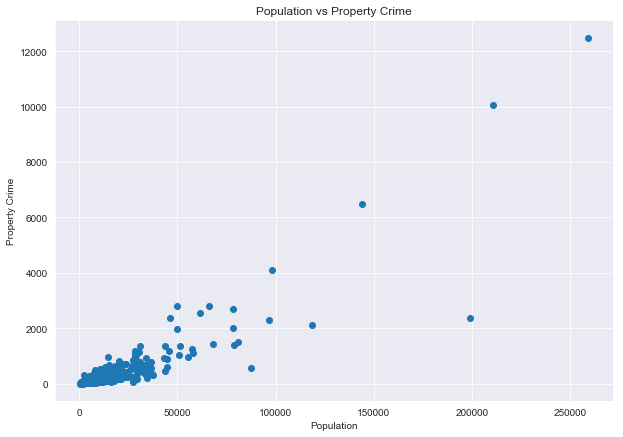

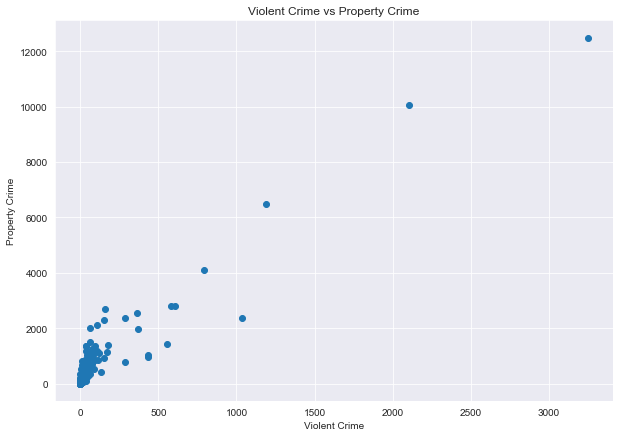

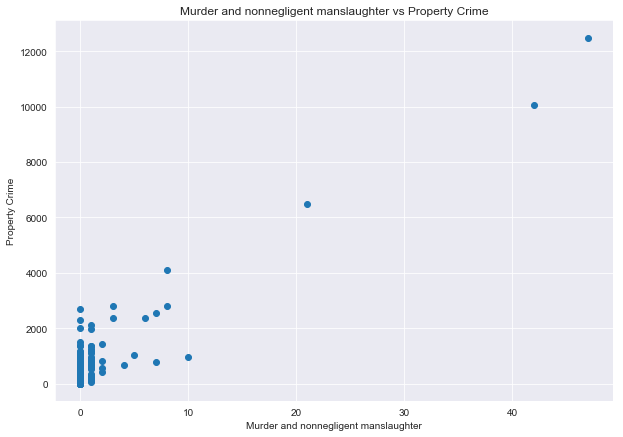

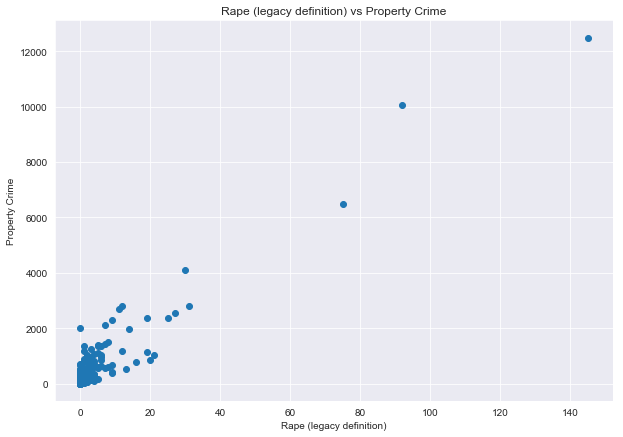

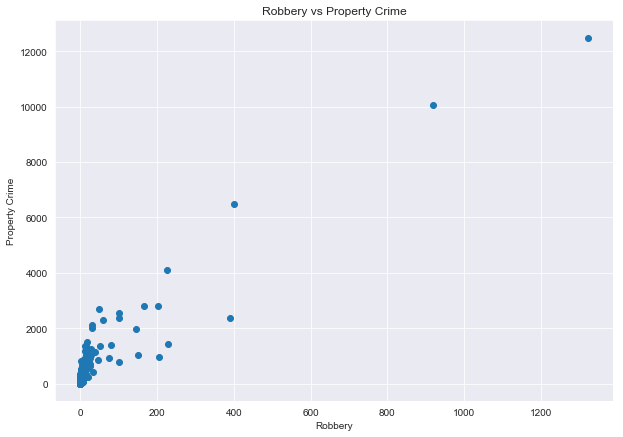

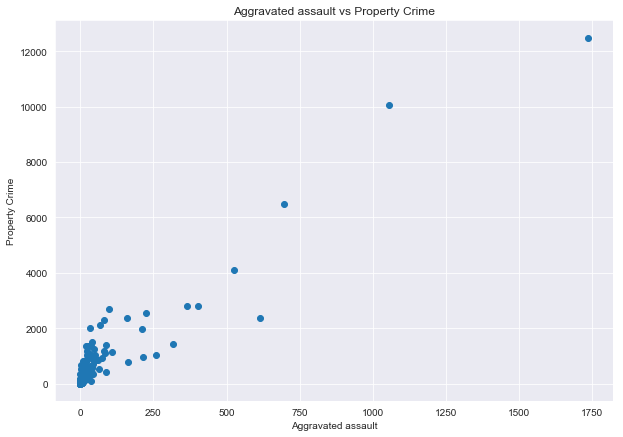

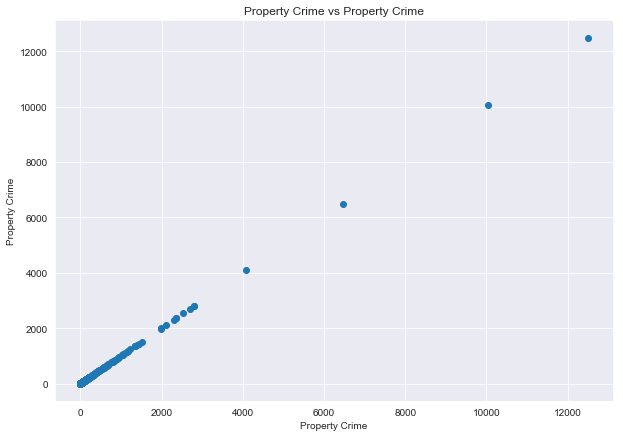

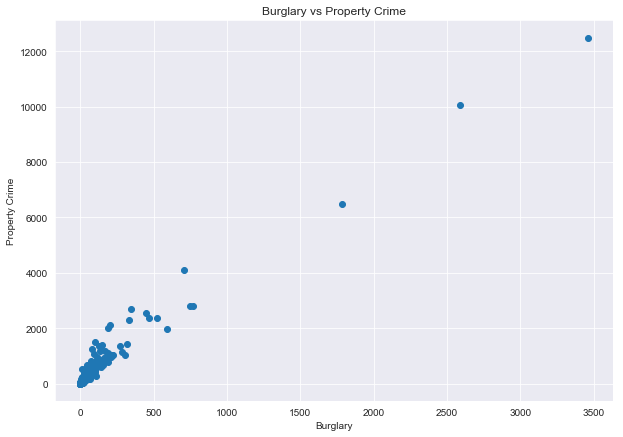

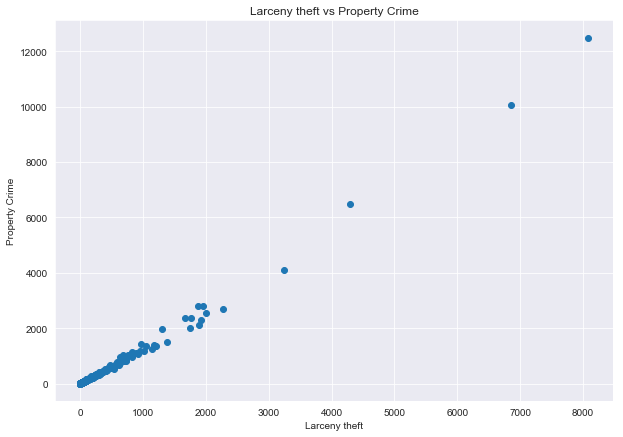

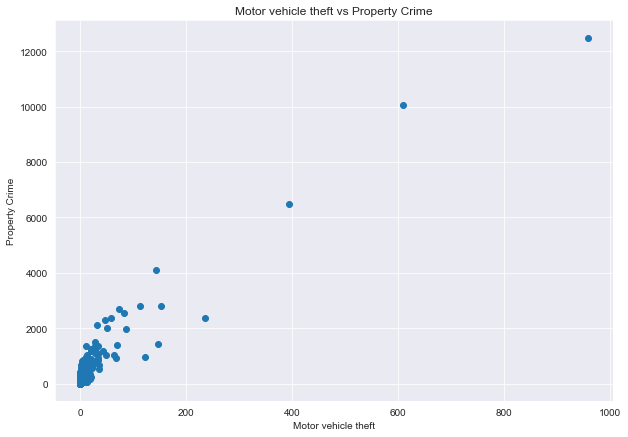

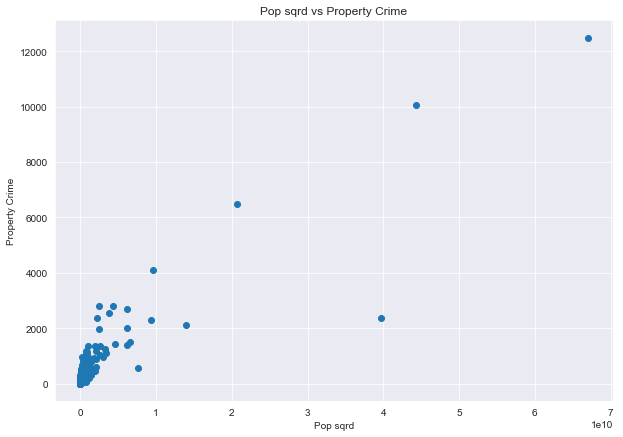

In [15]:
for feature in features:
    plt.scatter(df[feature], df['Property Crime'])
    plt.xlabel(feature)
    plt.ylabel('Property Crime')
    plt.title(feature + ' vs Property Crime')
    plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


Empty DataFrame
Columns: []
Index: []


In [51]:
df = df.drop('Arson', axis=1)

In [59]:
df['Population'].mean()

15956.685878962537